physics verfication test
manual circular velocity vs pynbody built-in

 loading h277 data...
snapshot loaded
centered on stellar component
 extracted 30 kpc sphere

 galaxy contents:
 stars:          7,063,428 particles
 gas:              583,243 particles
 dark matter:    1,237,591 particles
 total:          8,884,262 particles

 aligning disk to x-y plane...
disk aligned!
galaxy ready for analysis
method 1: pynbody's built-in profile
calculating total profile...
calculating stellar profile...
calculating gas profile...
calculating dark matter profile...

 pynbody calculations complete

 results:
 radial bins:        50
 peak total v_circ:  227.0 km/s
 peak stellar v_circ: 205.9 km/s
 peak DM v_circ:     155.7 km/s
method 2: manual calculations from first principles

 calculating using v = sqrt(GM/r)...

 setup:
 radial bins:     50
 radius range:    0.5 to 25.0 kpc
 bin spacing:     0.50 kpc

 extracting particle data ...
 stars:       7,063,428 particles
 gas:         583,243 partic

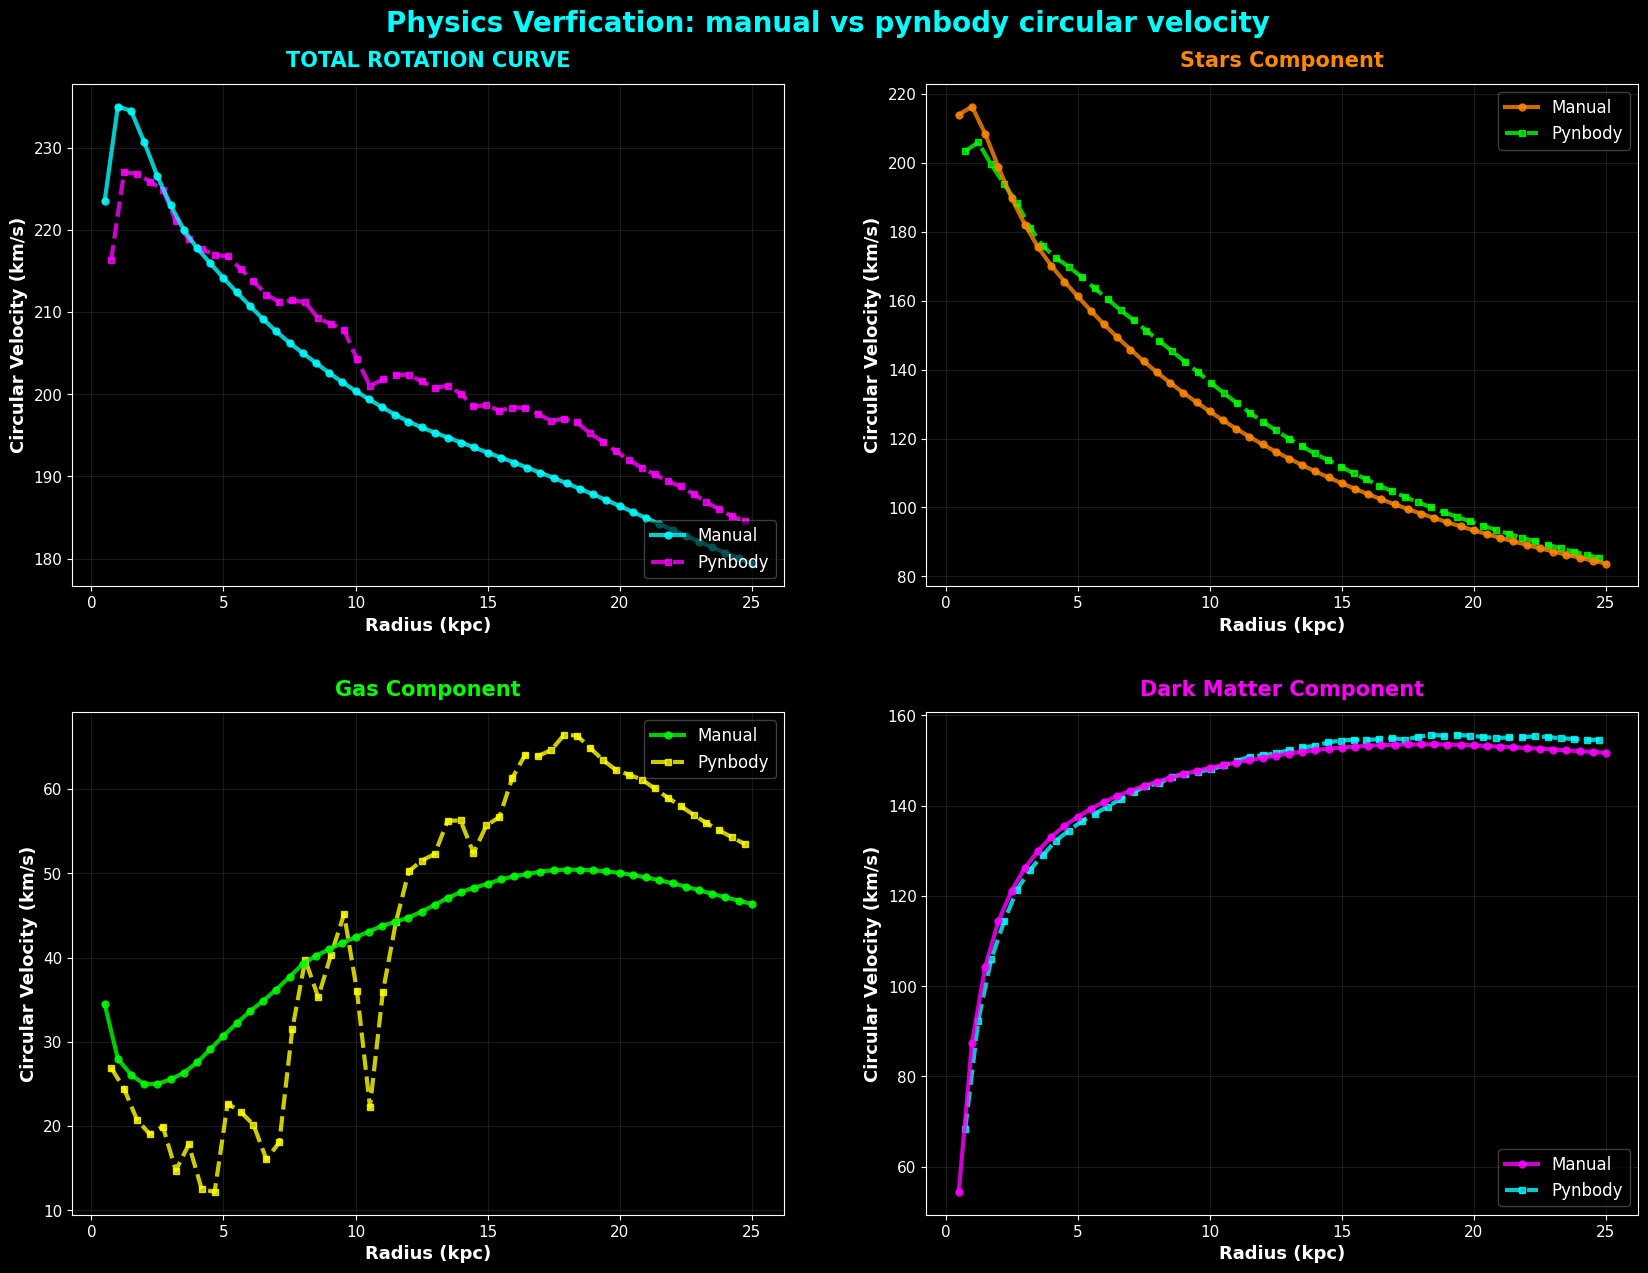

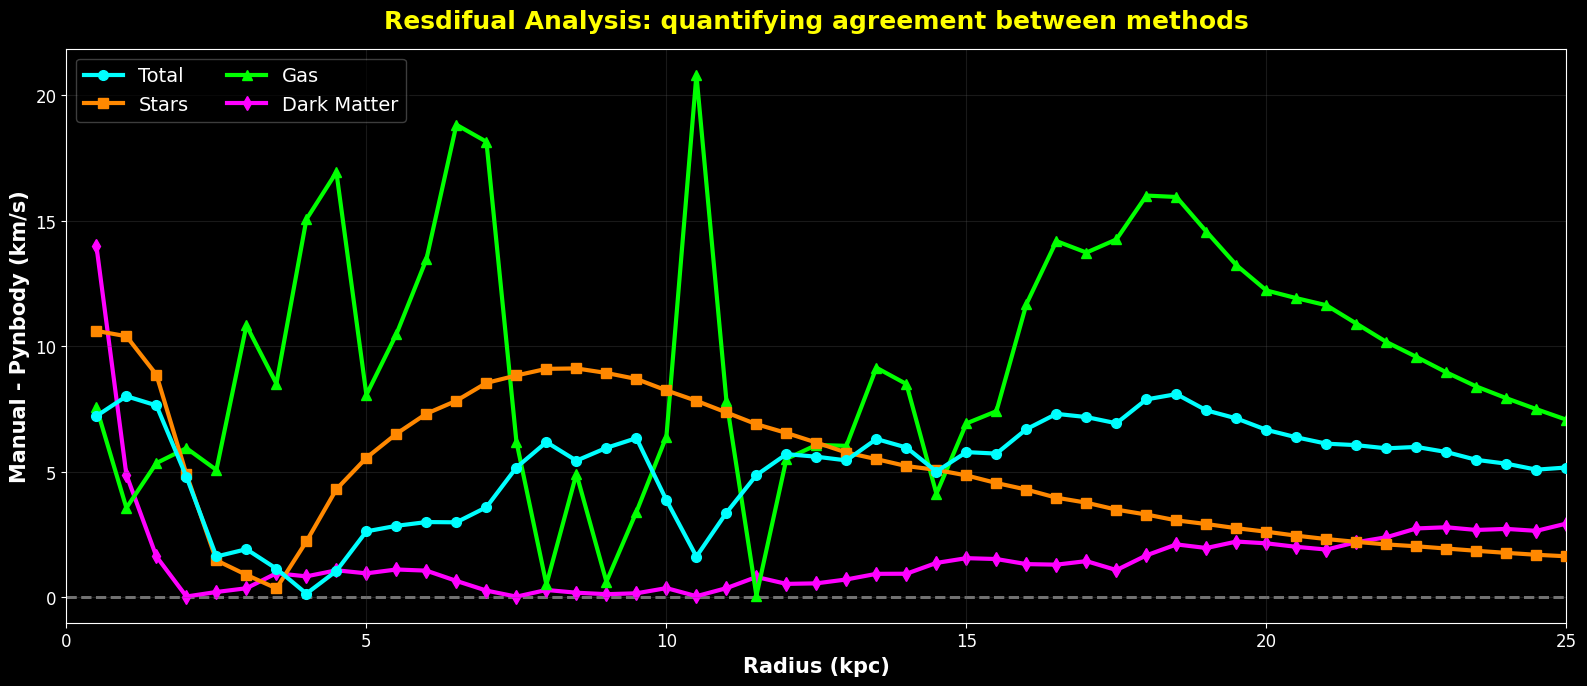

In [3]:
#!/usr/bin/env python3
"""
physics verfication: manual circular velocity calculation
-----------------------------------------------------------
testing our understanding of galaxy rotation curves from first principles!

we'll calculate v_circ = sqrt(GM/r) manually and compare with pynbody to verfy and understand the physics behind rotation curve decomposition.

"""

import numpy as np
import matplotlib.pyplot as plt
import pynbody
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')


# making nice plots 

plt.style.use('dark_background')
plt.rcParams.update({
    'figure.facecolor': '#000000',
    'axes.facecolor': '#000000',
    'savefig.facecolor': '#000000',
    'axes.edgecolor': '#FFFFFF',
    'axes.labelcolor': '#FFFFFF',
    'xtick.color': '#FFFFFF',
    'ytick.color': '#FFFFFF',
    'text.color': '#FFFFFF',
    'grid.color': '#333333',
    'grid.alpha': 0.4,
    'grid.linewidth': 0.8,
    'font.size': 11,
    'axes.labelsize': 13,
    'axes.titlesize': 15,
    'figure.titlesize': 18,
    'lines.linewidth': 2.5,
    'lines.markersize': 8
})

# neon color palette
NEON_COLORS = {
    'cyan': '#00FFFF',
    'magenta': '#FF00FF', 
    'yellow': '#FFFF00',
    'lime': '#00FF00',
    'orange': '#FF8800',
    'pink': '#FF0088',
    'blue': '#0088FF'
}

# constants
G = 4.302e-6  


print("physics verfication test")
print("manual circular velocity vs pynbody built-in")



# data 
print("\n loading h277 data...")
path = '/Users/johnmeftah/Downloads/galaxies_project/dataset_5/h277.cosmo50cmb.3072g14HMbwK.00492'

# loading snapshot
s = pynbody.load(path)
s.physical_units()  # converting comoving to physical coordinates
print("snapshot loaded")

# centering on baryonic matter (stars + gas)
pynbody.analysis.halo.center(s.star, mode='ssc')
print("centered on stellar component")

# extracting 30 kpc galaxy region
galaxy = s[pynbody.filt.Sphere('30 kpc')]
print(" extracted 30 kpc sphere")

print(f"\n galaxy contents:")
print(f" stars:       {len(galaxy.star):>12,} particles")
print(f" gas:         {len(galaxy.gas):>12,} particles")
print(f" dark matter: {len(galaxy.dm):>12,} particles")
print(f" total:       {len(galaxy):>12,} particles")

# aligning disk to x-y plane for accurate rotation curves
print(f"\n aligning disk to x-y plane...")
pynbody.analysis.angmom.faceon(s)
galaxy = s[pynbody.filt.Sphere('30 kpc')]  # re extracting after alignment
print("disk aligned!")
print("galaxy ready for analysis")

# method 1 - pynbody's built in calcylations 

print("method 1: pynbody's built-in profile")

# calculating profiles using pynbody

print("calculating total profile...")
p_total = pynbody.analysis.profile.Profile(galaxy, rmin='0.5 kpc', rmax='25 kpc', nbins=50)

print("calculating stellar profile...")
p_star = pynbody.analysis.profile.Profile(galaxy.star, rmin='0.5 kpc', rmax='25 kpc', nbins=50)

print("calculating gas profile...")
p_gas = pynbody.analysis.profile.Profile(galaxy.gas, rmin='0.5 kpc', rmax='25 kpc', nbins=50)

print("calculating dark matter profile...")
p_dm = pynbody.analysis.profile.Profile(galaxy.dm, rmin='0.5 kpc', rmax='25 kpc', nbins=50)

# extracting results
radii_pynbody = p_total['rbins'].in_units('kpc')
vcirc_total_pynbody = p_total['v_circ'].in_units('km s^-1')
vcirc_star_pynbody = p_star['v_circ'].in_units('km s^-1')
vcirc_gas_pynbody = p_gas['v_circ'].in_units('km s^-1')
vcirc_dm_pynbody = p_dm['v_circ'].in_units('km s^-1')

print(f"\n pynbody calculations complete")
print(f"\n results:")
print(f" radial bins:        {len(radii_pynbody)}")
print(f" peak total v_circ:  {vcirc_total_pynbody.max():.1f} km/s")
print(f" peak stellar v_circ: {vcirc_star_pynbody.max():.1f} km/s")
print(f" peak DM v_circ:     {vcirc_dm_pynbody.max():.1f} km/s")


# method 2 - manual calculations from first principles 


print("method 2: manual calculations from first principles")

print("\n calculating using v = sqrt(GM/r)...\n")

# defining radial bins (matching pynbody)
radii_manual = np.linspace(0.5, 25, 50)  # kpc
print(f" setup:")
print(f" radial bins:     {len(radii_manual)}")
print(f" radius range:    {radii_manual[0]:.1f} to {radii_manual[-1]:.1f} kpc")
print(f" bin spacing:     {radii_manual[1] - radii_manual[0]:.2f} kpc")

print(f"\n extracting particle data ...")

# getting particle positions and masses in physical units
x_star = galaxy.star['x'].in_units('kpc')
y_star = galaxy.star['y'].in_units('kpc')
z_star = galaxy.star['z'].in_units('kpc')
m_star = galaxy.star['mass'].in_units('Msol')
print(f" stars:       {len(m_star):,} particles")

x_gas = galaxy.gas['x'].in_units('kpc')
y_gas = galaxy.gas['y'].in_units('kpc')
z_gas = galaxy.gas['z'].in_units('kpc')
m_gas = galaxy.gas['mass'].in_units('Msol')
print(f" gas:         {len(m_gas):,} particles")

x_dm = galaxy.dm['x'].in_units('kpc')
y_dm = galaxy.dm['y'].in_units('kpc')
z_dm = galaxy.dm['z'].in_units('kpc')
m_dm = galaxy.dm['mass'].in_units('Msol')
print(f" dark matter: {len(m_dm):,} particles")

# calculating 3D radial distance from center for each particle
r_star = np.sqrt(x_star**2 + y_star**2 + z_star**2)
r_gas = np.sqrt(x_gas**2 + y_gas**2 + z_gas**2)
r_dm = np.sqrt(x_dm**2 + y_dm**2 + z_dm**2)
print(f"radial distances calculated")

print(f"\n calculating circular velocities ...")
print(f" using physics: v_circ = sqrt(GM_enclosed / r)")
print(f" G = {G:.3e} kpc (km/s)² / M_sun")

# initializing result arrays
vcirc_star_manual = np.zeros(len(radii_manual))
vcirc_gas_manual = np.zeros(len(radii_manual))
vcirc_dm_manual = np.zeros(len(radii_manual))
vcirc_total_manual = np.zeros(len(radii_manual))

# looping through each radial bin and calculate enclosed mass + v_circ
for i, r in enumerate(radii_manual):
    # step 1: summing all particle masses within this radius
    M_star_enc = np.sum(m_star[r_star <= r])
    M_gas_enc = np.sum(m_gas[r_gas <= r])
    M_dm_enc = np.sum(m_dm[r_dm <= r])
    M_total_enc = M_star_enc + M_gas_enc + M_dm_enc
    
    # step 2: applying Newton's formula for circular velocity
    # v_circ = sqrt(G * M_enclosed / radius)
    if r > 0:  # avoiding division by zero
        vcirc_star_manual[i] = np.sqrt(G * M_star_enc / r)
        vcirc_gas_manual[i] = np.sqrt(G * M_gas_enc / r)
        vcirc_dm_manual[i] = np.sqrt(G * M_dm_enc / r)
        vcirc_total_manual[i] = np.sqrt(G * M_total_enc / r)

print(f"processed {len(radii_manual)} radial bins")

print(f"\n manual calculations complete")
print(f"\nresults:")
print(f" peak total v_circ:  {vcirc_total_manual.max():.1f} km/s")
print(f" peak stellar v_circ: {vcirc_star_manual.max():.1f} km/s")
print(f" peak DM v_circ:     {vcirc_dm_manual.max():.1f} km/s")


# physics verfications - quadrature rule 


print("physics test: testing the quadrature rule")
print("\do components combine correctly?")
print("theory predicts: v_total^2 = v_star^2 + v_gas^2 + v_dm^2")
print("this comes from the fact that gravitational potentials add\n")

# calculating total v_circ from components using quadrature
vcirc_from_quadrature = np.sqrt(vcirc_star_manual**2 + vcirc_gas_manual**2 + vcirc_dm_manual**2)

# comparing with direct calculation
difference = np.abs(vcirc_total_manual - vcirc_from_quadrature)

print(f"comparison:")
print(f" maximum difference:  {difference.max():.10f} km/s")
print(f" mean difference:     {difference.mean():.10f} km/s")
print(f" RMS difference:      {np.sqrt(np.mean(difference**2)):.10f} km/s")

if difference.max() < 1e-6:
    print(f"\n quadrature rule condirmed to machine precision")
    print(f"this proves how gravitational potentials combine")
else:
    print(f"\n small numerical errors are expected from floating point arithmetic")


# comparison - manual vs pynbody

print("comparison: manual vs pynbody")

# calculating differences
diff_total = np.abs(vcirc_total_manual - vcirc_total_pynbody)
diff_star = np.abs(vcirc_star_manual - vcirc_star_pynbody)
diff_gas = np.abs(vcirc_gas_manual - vcirc_gas_pynbody)
diff_dm = np.abs(vcirc_dm_manual - vcirc_dm_pynbody)

print(f" total rotation curve:")
print(f" max difference:  {diff_total.max():.3f} km/s")
print(f" mean difference: {diff_total.mean():.3f} km/s")
print(f" RMS difference:  {np.sqrt(np.mean(diff_total**2)):.3f} km/s")
print(f" relative error:  {100*diff_total.max()/vcirc_total_pynbody.max():.2f}%")

print(f"\n stellar component:")
print(f" max difference:  {diff_star.max():.3f} km/s")
print(f" mean difference: {diff_star.mean():.3f} km/s")

print(f"\n gas componernt:")
print(f" max difference:  {diff_gas.max():.3f} km/s")
print(f" mean difference: {diff_gas.mean():.3f} km/s")

print(f"\n dark matter component:")
print(f" max difference:  {diff_dm.max():.3f} km/s")
print(f" mean difference: {diff_dm.mean():.3f} km/s")

# overall assessment
if diff_total.max() < 5:
    print(f"\n agreement within {diff_total.max():.1f} km/s!")
    print(f" manual calculation matches pynbody!")
elif diff_total.max() < 20:
    print(f"\n good agreement within {diff_total.max():.1f} km/s")
    print(f" small differences are likely due to binning methods")
else:
    print(f"\n larger differences detected")

# plotting

print("making comparison plots")

# fig 1 - component comparison grid 
print("\n making reating 2×2 component comparison grid...")

fig = plt.figure(figsize=(18, 13), facecolor='black')
gs = GridSpec(2, 2, figure=fig, hspace=0.25, wspace=0.20,
              left=0.08, right=0.95, top=0.93, bottom=0.06)

# title
fig.text(0.5, 0.97, 'Physics Verfication: manual vs pynbody circular velocity',
         ha='center', fontsize=20, fontweight='bold', color=NEON_COLORS['cyan'])

# panel 1: total
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor('black')
ax1.plot(radii_manual, vcirc_total_manual, 'o-', 
         color=NEON_COLORS['cyan'], linewidth=3, markersize=5, 
         label='Manual', alpha=0.8, zorder=3)
ax1.plot(radii_pynbody, vcirc_total_pynbody, 's--',
         color=NEON_COLORS['magenta'], linewidth=3, markersize=5, 
         label='Pynbody', alpha=0.8, zorder=2)
ax1.set_xlabel('Radius (kpc)', fontsize=13, fontweight='bold', color='white')
ax1.set_ylabel('Circular Velocity (km/s)', fontsize=13, fontweight='bold', color='white')
ax1.set_title('TOTAL ROTATION CURVE', fontsize=15, fontweight='bold', 
              color=NEON_COLORS['cyan'], pad=12)
ax1.legend(framealpha=0.3, fontsize=12, loc='lower right', 
          fancybox=True, shadow=True)
ax1.grid(True, alpha=0.3, color='#555555', linewidth=0.8)
ax1.tick_params(colors='white', labelsize=11)

# panel 2: stars
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_facecolor('black')
ax2.plot(radii_manual, vcirc_star_manual, 'o-',
         color=NEON_COLORS['orange'], linewidth=3, markersize=5,
         label='Manual', alpha=0.8, zorder=3)
ax2.plot(radii_pynbody, vcirc_star_pynbody, 's--',
         color=NEON_COLORS['lime'], linewidth=3, markersize=5,
         label='Pynbody', alpha=0.8, zorder=2)
ax2.set_xlabel('Radius (kpc)', fontsize=13, fontweight='bold', color='white')
ax2.set_ylabel('Circular Velocity (km/s)', fontsize=13, fontweight='bold', color='white')
ax2.set_title('Stars Component', fontsize=15, fontweight='bold',
              color=NEON_COLORS['orange'], pad=12)
ax2.legend(framealpha=0.3, fontsize=12, loc='upper right',
          fancybox=True, shadow=True)
ax2.grid(True, alpha=0.3, color='#555555', linewidth=0.8)
ax2.tick_params(colors='white', labelsize=11)

# panel 3: gas
ax3 = fig.add_subplot(gs[1, 0])
ax3.set_facecolor('black')
ax3.plot(radii_manual, vcirc_gas_manual, 'o-',
         color=NEON_COLORS['lime'], linewidth=3, markersize=5,
         label='Manual', alpha=0.8, zorder=3)
ax3.plot(radii_pynbody, vcirc_gas_pynbody, 's--',
         color=NEON_COLORS['yellow'], linewidth=3, markersize=5,
         label='Pynbody', alpha=0.8, zorder=2)
ax3.set_xlabel('Radius (kpc)', fontsize=13, fontweight='bold', color='white')
ax3.set_ylabel('Circular Velocity (km/s)', fontsize=13, fontweight='bold', color='white')
ax3.set_title('Gas Component', fontsize=15, fontweight='bold',
              color=NEON_COLORS['lime'], pad=12)
ax3.legend(framealpha=0.3, fontsize=12, loc='upper right',
          fancybox=True, shadow=True)
ax3.grid(True, alpha=0.3, color='#555555', linewidth=0.8)
ax3.tick_params(colors='white', labelsize=11)

# panel 4: dark matter
ax4 = fig.add_subplot(gs[1, 1])
ax4.set_facecolor('black')
ax4.plot(radii_manual, vcirc_dm_manual, 'o-',
         color=NEON_COLORS['magenta'], linewidth=3, markersize=5,
         label='Manual', alpha=0.8, zorder=3)
ax4.plot(radii_pynbody, vcirc_dm_pynbody, 's--',
         color=NEON_COLORS['cyan'], linewidth=3, markersize=5,
         label='Pynbody', alpha=0.8, zorder=2)
ax4.set_xlabel('Radius (kpc)', fontsize=13, fontweight='bold', color='white')
ax4.set_ylabel('Circular Velocity (km/s)', fontsize=13, fontweight='bold', color='white')
ax4.set_title('Dark Matter Component', fontsize=15, fontweight='bold',
              color=NEON_COLORS['magenta'], pad=12)
ax4.legend(framealpha=0.3, fontsize=12, loc='lower right',
          fancybox=True, shadow=True)
ax4.grid(True, alpha=0.3, color='#555555', linewidth=0.8)
ax4.tick_params(colors='white', labelsize=11)

plt.savefig('manual_vs_pynbody_comparison.png', 
            dpi=400, facecolor='black', edgecolor='none', bbox_inches='tight')


# fig 2: residuals plot
print("\n making residuals analysis plot...")

fig, ax = plt.subplots(figsize=(16, 7), facecolor='black')
ax.set_facecolor('black')

ax.plot(radii_manual, diff_total, 'o-', 
        color=NEON_COLORS['cyan'], linewidth=3, markersize=7,
        label='Total', zorder=4)
ax.plot(radii_manual, diff_star, 's-', 
        color=NEON_COLORS['orange'], linewidth=3, markersize=7,
        label='Stars', zorder=3)
ax.plot(radii_manual, diff_gas, '^-', 
        color=NEON_COLORS['lime'], linewidth=3, markersize=7,
        label='Gas', zorder=2)
ax.plot(radii_manual, diff_dm, 'd-', 
        color=NEON_COLORS['magenta'], linewidth=3, markersize=7,
        label='Dark Matter', zorder=1)

# zero reference line
ax.axhline(0, color='white', linestyle='--', linewidth=2, alpha=0.5, zorder=0)

ax.set_xlabel('Radius (kpc)', fontsize=15, fontweight='bold', color='white')
ax.set_ylabel('Manual - Pynbody (km/s)', fontsize=15, fontweight='bold', color='white')
ax.set_title('Resdifual Analysis: quantifying agreement between methods',
            fontsize=18, fontweight='bold', color=NEON_COLORS['yellow'], pad=15)
ax.legend(framealpha=0.3, fontsize=14, loc='upper left',
         fancybox=True, shadow=True, ncol=2)
ax.grid(True, alpha=0.3, color='#555555', linewidth=0.8)
ax.tick_params(colors='white', labelsize=12)
ax.set_xlim(0, 25)

plt.tight_layout()
plt.savefig('manual_pynbody_residuals.png', 
            dpi=400, facecolor='black', edgecolor='none', bbox_inches='tight')


# run summary


print("physics verfication complete")


print("\n key findings:\n")

print(f" peak velocity: {vcirc_total_manual.max():.1f} km/s\n")
print(f" maximum deviation: {difference.max():.2e} km/s\n")
print(f" relative error: {100*diff_total.max()/vcirc_total_pynbody.max():.2f}%")
print("\n analysis complete\n")